Passo 2:

In [ ]:
def xor_bits(a, b):
    """
    Realiza a operação de XOR bit a bit entre duas strings binárias de mesmo comprimento.
    """
    resultado = ""
    for i in range(len(a)):
        if a[i] == b[i]:
            resultado += '0'
        else:
            resultado += '1'
    return resultado


def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    """
    Calcula o CRC para uma sequência de dados M(x) usando um gerador G(x).

    Args:
        dados_bits: A string binária representando o polinômio da mensagem, M(x).
        gerador_bits: A string binária representando o polinômio gerador, G(x).

    Returns:
        A string binária de r bits representando o CRC.
    """
    # 1. Obtenha o grau 'r' do gerador.
    #    Lembre-se que um gerador de n bits representa um polinômio de grau n-1.
    r = len(gerador_bits) - 1

    # 2. Crie T(x)=  M(x) * 2^r, que é a mensagem com 'r' zeros anexados.
    mensagem_aumentada = list(dados_bits + '0' * r)

    # 3. Implemente o loop de divisão.
    #    Percorra os bit original da mensagem (em uma janela), da esquerda para a direita.
    for i in range(len(dados_bits)):
        # Se o bit mais significativo da 'janela' atual for '1', realize o XOR.
        # - considere a janela atual como os próximos r+1 bits. (para pode dividir o por G(x))
        if mensagem_aumentada[i] == '1':
            inicio = i
            fim = i + r + 1
            janela_atual = "".join(mensagem_aumentada[inicio : fim]) # inicio e fim devem calculados
            resultado_xor = xor_bits(janela_atual, gerador_bits)

            # Atualize a mensagem com o resultado do XOR.
            # - Substitua os bits correspondentes na mensagem pela saída do XOR,
#          ignorando o primeiro bit (que já foi processado).
            for j in range(len(resultado_xor)):
                mensagem_aumentada[i + j] = resultado_xor[j]

    # 4. O resto da divisão são os 'r' bits finais da mensagem processada.
    resto = "".join(mensagem_aumentada[-r:])
    return resto

: 

Caso de teste do Passo 2:

de acordo com os slides, para:


dados_teste = "1101011111"  # M(x)

gerador_teste = "10011" # G(x)

CRC esperado = "0010"

Quadro final para transmissão: "11010111110010" # T(x)



In [ ]:
# Exemplo de uso para validação
dados_teste = "1101011111"  # M(x)
gerador_teste = "10011"    # G(x)
crc_calculado = calcular_crc_manual(dados_teste, gerador_teste)

print(f"Dados M(x): {dados_teste}")
print(f"Gerador G(x): {gerador_teste}")
print(f"CRC Calculado: {crc_calculado}")
print(f"Quadro transmitido T(x): {dados_teste + crc_calculado}")
# Quadro T(x) a ser transmitido: dados_teste + crc_calculado

Dados M(x): 1101011111
Gerador G(x): 10011
CRC Calculado: 0010
Quadro transmitido T(x): 11010111110010


Passo 3:

In [ ]:
pip install crc

In [ ]:
import time
import tracemalloc
import os
from crc import Calculator, Crc16

# --- Insira sua função calcular_crc_manual e xor_bits aqui ---
def xor_bits(a, b):
    """
    Realiza a operação de XOR bit a bit entre duas strings binárias de mesmo comprimento.
    """
    resultado = ""
    for i in range(len(a)):
        if a[i] == b[i]:
            resultado += '0'
        else:
            resultado += '1'
    return resultado


def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    """
    Calcula o CRC para uma sequência de dados M(x) usando um gerador G(x).

    Args:
        dados_bits: A string binária representando o polinômio da mensagem, M(x).
        gerador_bits: A string binária representando o polinômio gerador, G(x).

    Returns:
        A string binária de r bits representando o CRC.
    """
    r = len(gerador_bits) - 1

    mensagem_aumentada = list(dados_bits + '0' * r)

    for i in range(len(dados_bits)):
        if mensagem_aumentada[i] == '1':
            inicio = i
            fim = i + r + 1
            janela_atual = "".join(mensagem_aumentada[inicio : fim]) # inicio e fim devem calculados
            resultado_xor = xor_bits(janela_atual, gerador_bits)

            for j in range(len(resultado_xor)):
                mensagem_aumentada[i + j] = resultado_xor[j]

    resto = "".join(mensagem_aumentada[-r:])
    return resto

 # --- Fim das funções calcular_crc_manual e xor_bits do passo 2 ---

 # Usando um padrão de 16 bits como referência
calculator_lib = Calculator(Crc16.MODBUS)

# Tamanhos de mensagem para teste (em bytes)
tamanhos_bytes = [1500, 3000 , 6000 , 16000]

resultados = []

for tamanho in tamanhos_bytes:
    print(f"Analisando para mensagem de {tamanho} bytes...")
    # Gere uma mensagem aleatória de bits
    mensagem_bytes = os.urandom(tamanho)
    mensagem_bits = "".join(format(byte, '08b') for byte in mensagem_bytes)

    # Medição da nossa Implementação
    tracemalloc.start()
    start_time = time.perf_counter()

    crc_manual = calcular_crc_manual(mensagem_bits, "11000000000000101") # G(x) do CRC-16/MODBUS

    end_time = time.perf_counter()
    mem_atual_manual, mem_pico_manual = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    tempo_manual = end_time - start_time

    # Medição da Biblioteca
    tracemalloc.start()
    start_time = time.perf_counter()

    crc_lib = calculator_lib.checksum(mensagem_bytes)

    end_time = time.perf_counter()
    mem_atual_lib, mem_pico_lib = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    tempo_lib = end_time - start_time

    # Armazene os resultados
    resultados.append({
        "tamanho": tamanho,
        "tempo_manual": tempo_manual,
        "mem_pico_manual": mem_pico_manual / 1024, # em KiB
        "tempo_lib": tempo_lib,
        "mem_pico_lib": mem_pico_lib / 1024 # em KiB
    })

print("--- Resultados Finais ---")
print(resultados)

Analisando para mensagem de 1500 bytes...
Analisando para mensagem de 3000 bytes...
Analisando para mensagem de 6000 bytes...
Analisando para mensagem de 16000 bytes...
--- Resultados Finais ---
[{'tamanho': 1500, 'tempo_manual': 0.3386074979999876, 'mem_pico_manual': 105.7509765625, 'tempo_lib': 0.15021909199992933, 'mem_pico_lib': 1.4453125}, {'tamanho': 3000, 'tempo_manual': 0.8172012109999969, 'mem_pico_manual': 211.2197265625, 'tempo_lib': 0.2944716309999649, 'mem_pico_lib': 1.21875}, {'tamanho': 6000, 'tempo_manual': 1.3464839139999185, 'mem_pico_manual': 422.1572265625, 'tempo_lib': 0.5448033549999991, 'mem_pico_lib': 1.21875}, {'tamanho': 16000, 'tempo_manual': 7.683712172000014, 'mem_pico_manual': 1125.2822265625, 'tempo_lib': 0.9092533119999189, 'mem_pico_lib': 1.21875}]


Gráficos:

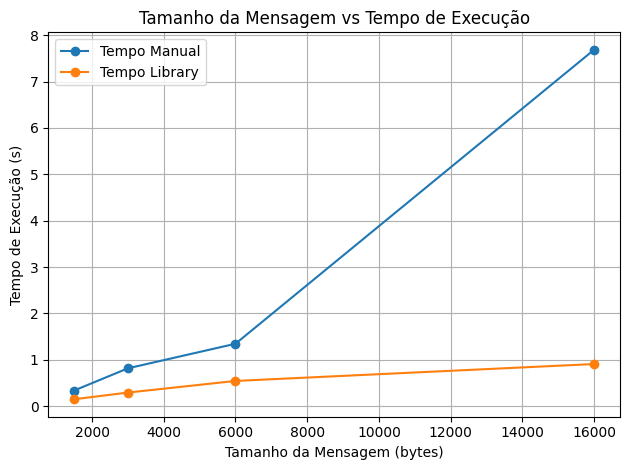

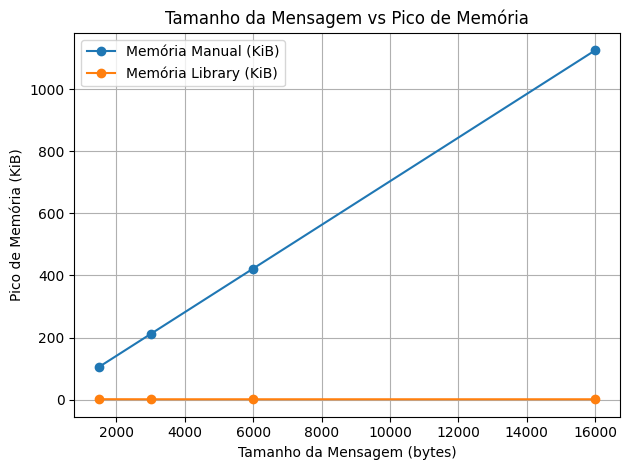

In [ ]:
import matplotlib.pyplot as plt


tamanhos = [r["tamanho"] for r in resultados]

tempo_manual = [r["tempo_manual"] for r in resultados]
tempo_lib = [r["tempo_lib"] for r in resultados]

mem_manual = [r["mem_pico_manual"] for r in resultados]
mem_lib = [r["mem_pico_lib"] for r in resultados]

# GRÁFICO 1 - TEMPO
plt.plot(tamanhos, tempo_manual, marker='o', label="Tempo Manual")
plt.plot(tamanhos, tempo_lib, marker='o', label="Tempo Library")
plt.xlabel("Tamanho da Mensagem (bytes)")
plt.ylabel("Tempo de Execução (s)")
plt.title("Tamanho da Mensagem vs Tempo de Execução")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# GRÁFICO 2 - MEMÓRIA
plt.plot(tamanhos, mem_manual, marker='o', label="Memória Manual (KiB)")
plt.plot(tamanhos, mem_lib, marker='o', label="Memória Library (KiB)")
plt.xlabel("Tamanho da Mensagem (bytes)")
plt.ylabel("Pico de Memória (KiB)")
plt.title("Tamanho da Mensagem vs Pico de Memória")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


##Parte4:

###4.1:

In [ ]:
#Andre Tharssys Marques Soares - 123110543
mensagem_base_andre = "0110000101101110011001000111001001100101001000000111010001101000011000010111001001110011011100110111100101110011001000000110110101100001011100100111000101110101011001010111001100100000011100110110111101100001011100100110010101110011"
gerador_andre = "10001000000100001" #matricula com final 3
crc_andre = calcular_crc_manual(mensagem_base_andre, gerador_andre)

print(f'Variável      | Valor')
print("________________________\n")
print(f'Mensagem      | {mensagem_base_andre + crc_andre}')
print(f'Mensagem_Base | {mensagem_base_andre}')
print(f'CRC           | {crc_andre}')

Variável      | Valor
________________________

Mensagem      | 01100001011011100110010001110010011001010010000001110100011010000110000101110010011100110111001101111001011100110010000001101101011000010111001001110001011101010110010101110011001000000111001101101111011000010111001001100101011100110011010100100110
Mensagem_Base | 0110000101101110011001000111001001100101001000000111010001101000011000010111001001110011011100110111100101110011001000000110110101100001011100100111000101110101011001010111001100100000011100110110111101100001011100100110010101110011
CRC           | 0011010100100110


In [ ]:
#Vinícius Gabriel Laureano - 123111119
mensagem_base_vinicius = "01010110011010010110111011101101011000110110100101110101011100110010000001000111011000010110001001110010011010010110010101101100001000000100110001100001011101010111001001100101011000010110111001101111"
gerador_vinicius = "10001000000100001" #matricula com final 9
crc_vinicius = calcular_crc_manual(mensagem_base_vinicius, gerador_vinicius)

print(f'Variável      | Valor')
print("________________________\n")
print(f'Mensagem      | {mensagem_base_vinicius + crc_vinicius}')
print(f'Mensagem_Base | {mensagem_base_vinicius}')
print(f'CRC           | {crc_vinicius}')

Variável      | Valor
________________________

Mensagem      | 010101100110100101101110111011010110001101101001011101010111001100100000010001110110000101100010011100100110100101100101011011000010000001001100011000010111010101110010011001010110000101101110011011110001001110011000
Mensagem_Base | 01010110011010010110111011101101011000110110100101110101011100110010000001000111011000010110001001110010011010010110010101101100001000000100110001100001011101010111001001100101011000010110111001101111
CRC           | 0001001110011000


In [ ]:
#Telmano Leite Japiassú Neto - 123110782
mensagem_base_telmano = "010101000110010101101100011011010110000101101110011011110010000001001100011001010110100101110100011001010010000001001010011000010111000001101001011000010111001101110011111110101010000001001110011001010111010001101111"
gerador_telmano = "11000000000000101" #matricula com final 2
crc_telmano = calcular_crc_manual(mensagem_base_telmano, gerador_telmano)

print(f'Variável      | Valor')
print("________________________\n")
print(f'Mensagem      | {mensagem_base_telmano + crc_telmano}')
print(f'Mensagem_Base | {mensagem_base_telmano}')
print(f'CRC           | {crc_telmano}')

Variável      | Valor
________________________

Mensagem      | 0101010001100101011011000110110101100001011011100110111100100000010011000110010101101001011101000110010100100000010010100110000101110000011010010110000101110011011100111111101010100000010011100110010101110100011011110010010001000110
Mensagem_Base | 010101000110010101101100011011010110000101101110011011110010000001001100011001010110100101110100011001010010000001001010011000010111000001101001011000010111001101110011111110101010000001001110011001010111010001101111
CRC           | 0010010001000110


####4.2:

In [ ]:
import random

calculator_lib = Calculator(Crc16.MODBUS)

def bits_to_bytes(bits: str) -> bytes:
    return int(bits, 2).to_bytes(len(bits) // 8, byteorder="big")

def aplicar_erro(quadro, padrao, pos):
    quadro = list(quadro)
    for i in range(len(padrao)):
        quadro[pos + i] = '1' if quadro[pos + i] == '0' else '0'
    return "".join(quadro)

def caca_dos_erros(dados, gerador, tamanho_rajada=6, quant_testes=10):
  #print("Iniciando Caça dos Erros")

  r = len(gerador) - 1

  crc_manual = calcular_crc_manual(dados, gerador)
  quadro = dados + crc_manual

  #print(f'Quadro        | {quadro}')
  #print(f'Mensagem_Base | {dados}')
  #print(f'Gerador       | {gerador}')
  #print(f'CRC           | {crc_manual}')

  resultados = []

  for test in range(quant_testes):
        print(f"Teste {test+1}")

        padrao_erro = ''.join(random.choice('01') for _ in range(tamanho_rajada))

        pos = random.randint(0, len(quadro) - tamanho_rajada)

        print(f"Posição do inico dos bits trocados: {pos}")

        quadro_corr = aplicar_erro(quadro, padrao_erro, pos)
        print(f"Quadro Corrompido: {quadro_corr}")

        crc_manual = calcular_crc_manual(quadro_corr, gerador)

        quadro_corr_bytes = bits_to_bytes(quadro_corr)

        crc_lib = calculator_lib.checksum(quadro_corr_bytes)

        detectou_manual = (crc_manual != "0" * r)
        detectou_lib = (crc_lib != 0)

        print(f"CRC manual: {crc_manual}")
        print(f"CRC lib:    {crc_lib}")
        print(f"Detectou (manual)? {detectou_manual}")
        print(f"Detectou (lib)?    {detectou_lib}\n")

        resultados.append({
            "padrao": padrao_erro,
            "pos": pos,
            "crc_manual": crc_manual,
            "crc_lib": crc_lib,
            "detectou_manual": detectou_manual,
            "detectou_lib": detectou_lib
        })


  #print(tamanho_rajada)
  return resultados


In [ ]:
i = 1  # tamanho inicial do padrão de erro
total_bits = len(mensagem_base_andre + crc_andre)

while True:
    print(f"Testando padrão de erro de tamanho {i} bits")

    if i > total_bits:
        break

    resultados = caca_dos_erros(mensagem_base_andre, gerador_andre, i)

    for r in resultados:
        if (not r["detectou_manual"]) or (not r["detectou_lib"]):
            print("\nPadrão de erro NÃO DETECTADO ENCONTRADO!")
            print(f"Tamanho do erro: {i} bits")
            print(f"Posição: {r['pos']}")
            print(f"Padrão: {r['padrao']}")
            print(f"CRC Manual: {r['crc_manual']}")
            print(f"CRC Biblioteca: {r['crc_lib']}")
            print(f"Manual detectou? {r['detectou_manual']}")
            print(f"Biblioteca detectou? {r['detectou_lib']}")
            quit()

    i += 1


Testando padrão de erro de tamanho 1 bits
Testando padrão de erro de tamanho 2 bits
Testando padrão de erro de tamanho 3 bits
Testando padrão de erro de tamanho 4 bits
Testando padrão de erro de tamanho 5 bits
Testando padrão de erro de tamanho 6 bits
Testando padrão de erro de tamanho 7 bits
Testando padrão de erro de tamanho 8 bits
Testando padrão de erro de tamanho 9 bits
Testando padrão de erro de tamanho 10 bits
Testando padrão de erro de tamanho 11 bits
Testando padrão de erro de tamanho 12 bits
Testando padrão de erro de tamanho 13 bits
Testando padrão de erro de tamanho 14 bits
Testando padrão de erro de tamanho 15 bits
Testando padrão de erro de tamanho 16 bits
Testando padrão de erro de tamanho 17 bits
Testando padrão de erro de tamanho 18 bits
Testando padrão de erro de tamanho 19 bits
Testando padrão de erro de tamanho 20 bits
Testando padrão de erro de tamanho 21 bits
Testando padrão de erro de tamanho 22 bits
Testando padrão de erro de tamanho 23 bits
Testando padrão de e